# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fathur Rahman Al Farizy
- **Email:** fathur.alfarizy02@gmail.com
- **ID Dicoding:** fralfrzy

## Menentukan Pertanyaan Bisnis

1. Bagaimana perkembangan total penjualan seluruh produk tiap bulannya pada periode 2016-2018?
2. Kategori produk apa yang mendapatkan hasil penjualan tertinggi selama periode 2016-2018?
3. Kategori produk apa yang mendapatkan hasil penjualan terendah selama periode 2016-2018?
4. Kategori produk apa yang mendapatkan rata-rata skor review terendah dari pelanggan pada periode 2016-2018? 
5. Faktor apa yang menyebabkan kategori produk tertentu mendapatkan rata-rata skor review terendah dari pelanggan pada periode tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
# Mengatur data directory
data_dir = 'data/E-Commerce-Public-Dataset'

In [3]:
# Membaca data csv ke dalam dataframe
sellers_df = pd.read_csv(f'{data_dir}/sellers_dataset.csv')
geolocation_df = pd.read_csv(f'{data_dir}/geolocation_dataset.csv')
customers_df = pd.read_csv(f'{data_dir}/customers_dataset.csv')
orders_df = pd.read_csv(f'{data_dir}/orders_dataset.csv')
order_reviews_df = pd.read_csv(f'{data_dir}/order_reviews_dataset.csv')
order_payments_df = pd.read_csv(f'{data_dir}/order_payments_dataset.csv')
order_items_df = pd.read_csv(f'{data_dir}/order_items_dataset.csv')
products_df = pd.read_csv(f'{data_dir}/products_dataset.csv')
product_translations_df = pd.read_csv(f'{data_dir}/product_category_name_translation.csv')

In [4]:
# Melihat 5 data teratas dari dataframe sellers
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [5]:
# Melihat 5 data teratas dari dataframe customers
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Melihat 5 data teratas dari dataframe orders
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
# Mengecek tipe data dari setiap kolom di dataframe orders_df
orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [8]:
# Mengubah kolom yang menunjukkan waktu penanggalan menjadi tipe data datetime
orders_df.order_purchase_timestamp = pd.to_datetime(orders_df.order_purchase_timestamp)
orders_df.order_approved_at = pd.to_datetime(orders_df.order_approved_at)
orders_df.order_delivered_carrier_date = pd.to_datetime(orders_df.order_delivered_carrier_date)
orders_df.order_delivered_customer_date = pd.to_datetime(orders_df.order_delivered_customer_date)
orders_df.order_estimated_delivery_date = pd.to_datetime(orders_df.order_estimated_delivery_date)

In [9]:
# Mengurutkan data berdasarkan waktu pembelian ('order_purchase_timestamp')
orders_df = orders_df.sort_values(by='order_purchase_timestamp')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25


In [10]:
# Melihat 5 data teratas dari dataframe order_items
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
# Mengecek tipe data dari setiap kolom di dataframe order_items_df
order_items_df.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [12]:
# Mengubah kolom yang menunjukkan waktu penanggalan menjadi tipe data datetime
order_items_df.shipping_limit_date = pd.to_datetime(order_items_df.shipping_limit_date)

In [13]:
# Melihat 5 data teratas dari dataframe products
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
# Melihat 5 data teratas dari dataframe product_translations
product_translations_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [15]:
# Melihat 5 data teratas dari dataframe order_payments
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [16]:
# Melihat 5 data teratas dari dataframe order_reviews
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [17]:
# Mengecek tipe data dari setiap kolom di dataframe order_reviews_df
order_reviews_df.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [18]:
# Mengubah kolom yang menunjukkan waktu penanggalan menjadi tipe data datetime
order_reviews_df.review_creation_date = pd.to_datetime(order_reviews_df.review_creation_date)
order_reviews_df.review_answer_timestamp = pd.to_datetime(order_reviews_df.review_answer_timestamp)

Berdasarkan informasi dari dataframe di atas maka dapat ditentukan beberapa dataframe yang akan digunakan untuk masing-masing pertanyaan sebagai berikut: 
- Pertanyaan 1 : `orders_df`, `order_items_df`.
- Pertanyaan 2 dan 3 : `orders_df`, `order_items_df`, `products_df`, `product_translations_df`
- Pertanyaan 4 : `orders_df`, `order_items_df`, `products_df`, `product_translations_df`, `order_reviews_df`
- Pertanyaan 5 : `orders_df`, `order_items_df`, `products_df`, `product_translations_df`, `order_reviews_df`, `order_payments_df`

**Insight:**
- Dataset E-Commerce yang digunakan mencakup data pesanan (`orders_df`, `order_reviews_df`, `order_items_df`, `order_payments_df`) dan data produk (`products_df`, `products_translation_df`).

### Assessing Data

#### `df1`

##### Mengecek Data yang Duplikat

In [19]:
# Menggabungkan dataframe orders dan order_items
df1 = pd.merge(orders_df, order_items_df, on='order_id', how='outer')
df1 = df1.sort_values(by='order_purchase_timestamp', ascending=False)
df1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
7392,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,canceled,2018-10-17 17:30:18,NaT,NaT,NaT,2018-10-30,NaN,NaN,NaN,NaT,NaN,NaN
78023,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,NaN,NaN,NaN,NaT,NaN,NaN
71834,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,NaN,NaN,NaN,NaT,NaN,NaN
43094,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,NaN,NaN,NaN,NaT,NaN,NaN
25326,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,NaN,NaN,NaN,NaT,NaN,NaN


In [20]:
# Mengecek data yang duplikat pada df1
df1.duplicated().sum()

0

In [ ]:
# Mengecek data yang duplikat pada order_id
df1[(df1.duplicated(subset=['order_id'], keep=False))].sort_values(by=['order_id','order_item_id'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06,1.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06,2.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,1.0,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,2.0,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
35,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,3.0,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113410,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,2018-03-17 12:29:22,2018-03-21 19:22:25,2018-04-07 10:07:48,2018-04-19,2.0,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
113415,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27,1.0,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
113416,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27,2.0,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
113417,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27,3.0,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [22]:
order_check = df1.groupby('order_id').agg({
    'order_item_id': 'nunique',  
    'product_id': 'nunique'  
}).reset_index()

# Ambil order_id yang memiliki lebih dari 1 order_item_id dan lebih dari 1 product_id
filtered_orders = order_check[(order_check['order_item_id'] > 1) & (order_check['product_id'] > 1)]

In [23]:
filtered_orders

,order_id,order_item_id,product_id
74,002f98c0f7efd42638ed6100ca699b42,2,2
83,00337fe25a3780b3424d9ad7c5a4b35e,2,2
135,005d9a5423d47281ac463a968b3936fb,3,2
199,00946f674d880be1f188abc10ad7cf46,2,2
209,0097f0545a302aafa32782f1734ff71c,2,2
...,...,...,...
99330,ffb18bf111fa70edf316eb0390427986,3,2
99338,ffb8f7de8940249a3221252818937ecb,3,3
99339,ffb9a9cd00c74c11c24aa30b3d78e03b,4,3
99350,ffc16cecff8dc037f60458f28d1c1ba5,2,2


In [24]:
df1[df1['order_id'].isin(filtered_orders['order_id'])].sort_values(by=['order_id','order_item_id'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
81,002f98c0f7efd42638ed6100ca699b42,75fd1fb0bb511fc71ac2b2649c02b21b,delivered,2017-08-04 09:19:10,2017-08-04 09:30:15,2017-08-04 18:09:47,2017-08-07 19:07:30,2017-09-05,1.0,d41dc2f2979f52d75d78714b378d4068,7299e27ed73d2ad986de7f7c77d919fa,2017-08-10 09:30:15,8.99,32.57
82,002f98c0f7efd42638ed6100ca699b42,75fd1fb0bb511fc71ac2b2649c02b21b,delivered,2017-08-04 09:19:10,2017-08-04 09:30:15,2017-08-04 18:09:47,2017-08-07 19:07:30,2017-09-05,2.0,880be32f4db1d9f6e2bec38fb6ac23ab,fa40cc5b934574b62717c68f3d678b6d,2017-08-10 09:30:15,44.90,7.16
92,00337fe25a3780b3424d9ad7c5a4b35e,4b1b5c848616a4b5fa9d76cb1d12067b,delivered,2017-09-25 17:39:29,2017-09-25 17:50:16,2017-09-26 22:31:51,2017-09-27 16:52:40,2017-10-10,1.0,1f9799a175f50c9fa725984775cac5c5,cfb1a033743668a192316f3c6d1d2671,2017-09-29 17:50:16,59.90,9.94
93,00337fe25a3780b3424d9ad7c5a4b35e,4b1b5c848616a4b5fa9d76cb1d12067b,delivered,2017-09-25 17:39:29,2017-09-25 17:50:16,2017-09-26 22:31:51,2017-09-27 16:52:40,2017-10-10,2.0,13944d17b257432717fd260e69853140,cfb1a033743668a192316f3c6d1d2671,2017-09-29 17:50:16,59.90,9.94
152,005d9a5423d47281ac463a968b3936fb,a2be07c22a9d2071f65b6770e47f540b,delivered,2017-10-18 12:14:29,2017-10-18 12:28:16,2017-10-24 14:56:52,2017-10-27 19:19:43,2017-11-17,1.0,fb7a100ec8c7b34f60cec22b1a9a10e0,d98eec89afa3380e14463da2aabaea72,2017-10-24 12:28:16,49.99,18.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113311,ffb9a9cd00c74c11c24aa30b3d78e03b,81a0150b8f472d0e5e82a7da198b93bc,delivered,2017-03-11 17:20:21,2017-03-11 17:20:21,2017-03-22 08:48:30,2017-03-28 15:26:02,2017-04-13,4.0,3321ad579f19476d0d668f726f8dffec,da8622b14eb17ae2831f4ac5b9dab84a,2017-03-22 17:20:21,219.90,22.18
113322,ffc16cecff8dc037f60458f28d1c1ba5,bca26aa1960632e9fcb269e5eb8faabd,delivered,2017-11-21 19:25:15,2017-11-21 19:34:24,2017-11-23 18:38:50,2017-11-25 13:07:03,2017-12-01,1.0,241e398aacc909372622952b2ec6f954,de23c3b98a88888289c6f5cc1209054a,2017-11-27 19:34:24,179.90,10.03
113323,ffc16cecff8dc037f60458f28d1c1ba5,bca26aa1960632e9fcb269e5eb8faabd,delivered,2017-11-21 19:25:15,2017-11-21 19:34:24,2017-11-23 18:38:50,2017-11-25 13:07:03,2017-12-01,2.0,7c1043bb5837db0c6bc1953419a18628,de23c3b98a88888289c6f5cc1209054a,2017-11-27 19:34:24,169.90,10.04
113344,ffd543c2b60842e148a86870dc60e212,1a4eed32aecb25c4c294408905613487,delivered,2018-01-04 12:00:49,2018-01-05 02:35:33,2018-01-15 21:23:17,2018-01-17 20:18:44,2018-02-06,1.0,3ce943997ff85cad84ec6770b35d6bcd,9c0e69c7bf2619675bbadf47b43f655a,2018-01-11 02:35:33,175.90,7.15


In [25]:
df1[df1.duplicated(subset=['order_id','product_id'], keep=False)].sort_values(by=['order_id','order_item_id'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06,1.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06,2.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,1.0,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,2.0,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
35,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,3.0,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113410,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,2018-03-17 12:29:22,2018-03-21 19:22:25,2018-04-07 10:07:48,2018-04-19,2.0,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
113415,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27,1.0,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
113416,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27,2.0,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
113417,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27,3.0,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [26]:
df1.product_id.nunique()

32951

In [27]:
df1_clean = df1.dropna(subset=['order_item_id'])
df1_clean = df1_clean.loc[df1_clean.groupby('order_id')['order_item_id'].idxmax()]

In [28]:
df1_clean[df1_clean.product_id.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
42,0019c29108428acffd089c36103c9440,5f6bbac628ae418db4e0f92932f899c1,delivered,2018-03-06 06:40:28,2018-03-06 06:50:26,2018-03-07 01:20:05,2018-03-16 22:34:53,2018-04-11,1.0,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-03-12 06:50:26,59.90,19.95
137,005059edee63c8c708ba61910793b31b,d3b3960bebb0ff8c6edb75c8edd39212,delivered,2018-02-05 18:25:51,2018-02-06 18:30:33,2018-02-07 17:31:55,2018-02-19 21:39:12,2018-03-06,2.0,84f456958365164420cfc80fbe4c7fab,4a3ca9315b744ce9f8e9374361493884,2018-02-12 18:30:33,92.00,17.89
243,00a0116ff15ff973ea16bee881208ae7,89a187407adfc8a32a4d6233a6a237d8,delivered,2018-02-18 16:22:23,2018-02-18 17:27:05,2018-02-19 18:22:53,2018-03-03 00:38:50,2018-03-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-22 17:27:05,149.00,45.12
257,00a690becda145533fa5a54daa7b6ad5,2826dbfaa1d90ea2b97c93c35fc4cd92,delivered,2018-04-08 21:55:50,2018-04-08 22:09:40,2018-04-09 22:28:54,2018-04-24 12:57:05,2018-05-08,1.0,c2ece64199af7a53793ed9612a89a8cd,6c7d50c24b3ccd2fd83b44d8bb34e073,2018-04-12 22:09:40,88.34,29.08
274,00af53fdc2002f5b6a8f16db648e003b,b1517b4078772e718a46e03f9ea9321f,delivered,2017-06-20 15:00:00,2017-06-20 15:15:17,2017-06-23 12:15:50,2017-07-03 14:59:32,2017-07-10,1.0,c6336fa91fbd87c359e44f5dca5a90ed,4c2b230173bb36f9b240f2b8ac11786e,2017-06-26 15:15:17,39.90,11.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113419,fffbee3b5462987e66fb49b1c5411df2,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-19 09:58:03,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23,1.0,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03
113420,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
113421,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,1.0,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
113422,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,1.0,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95


In [29]:
df1_clean[df1_clean.product_id == '28b4eced95a52d9c437a4caf9d311b95']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,001427c0ec99cf8af737bd88e92fd444,eab9c552374be06ed15923016dc9e588,delivered,2018-04-07 18:51:22,2018-04-07 19:08:28,2018-04-09 23:29:32,2018-04-25 23:38:41,2018-05-10,1.0,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-04-12 19:08:28,59.9,23.35
42,0019c29108428acffd089c36103c9440,5f6bbac628ae418db4e0f92932f899c1,delivered,2018-03-06 06:40:28,2018-03-06 06:50:26,2018-03-07 01:20:05,2018-03-16 22:34:53,2018-04-11,1.0,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-03-12 06:50:26,59.9,19.95
1008,025321e4e9674e090b7bc101f9c5ab5a,3674db4a48cbcbd032d3d2274f9018af,delivered,2017-06-20 21:56:51,2017-06-20 22:10:14,2017-06-22 18:14:03,2017-07-02 12:41:52,2017-07-12,1.0,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2017-06-26 22:10:14,59.9,50.92
8773,13ee50026b736b8311e25b3a7bd37f64,90a7b984cf62aef0f211f392d7753541,delivered,2018-04-18 12:07:23,2018-04-19 02:32:24,2018-04-19 23:42:45,2018-04-27 15:32:53,2018-05-16,1.0,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-04-25 02:31:38,59.9,16.39
17809,288ca6904834f3c53b074ca4cf8ea81b,140986e1d09b23a0b33837c2cabefb3e,delivered,2018-04-25 22:00:54,2018-04-25 22:55:19,2018-04-26 15:23:00,2018-05-11 14:25:47,2018-05-22,1.0,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-05-02 22:55:19,59.9,24.55
21477,30c81e4049d16861db007699a31d9a5e,83077f14414686e9a226bda8826ea461,delivered,2018-02-16 17:47:32,2018-02-16 18:05:26,2018-02-19 23:42:22,2018-02-28 20:32:15,2018-03-12,1.0,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-02-22 17:05:26,59.9,16.99
32504,491f5fabbd1c4d86ab4ae7a2024d7368,4d60b9bf2c64e3e1b29c297752050aa2,delivered,2018-01-12 16:57:17,2018-01-16 03:50:24,2018-01-18 00:27:55,2018-01-30 21:04:30,2018-02-07,2.0,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-01-22 03:50:24,59.9,17.06
48729,6dfce09652603d20237e1bc7caf8fd38,7351112249105109b7979df7a2fa2e59,delivered,2018-05-03 08:57:15,2018-05-05 03:33:39,2018-05-08 15:37:00,2018-05-14 11:58:52,2018-05-28,5.0,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-05-10 03:31:20,59.9,19.39
57116,810866331b08e6226337a3b29fd8c980,edf2cbbe8938f4db1da137cf67b56ac3,delivered,2017-11-06 15:49:24,2017-11-07 15:46:36,2017-11-08 20:07:40,2017-11-18 01:38:42,2017-11-30,1.0,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2017-11-13 15:46:36,59.9,18.96
59641,86f452af7e6c8314fa5b43b768eb9d0d,2990678379ad404c1f529701dbdb157e,delivered,2018-07-19 13:50:48,2018-07-19 14:03:01,2018-07-19 15:34:00,2018-07-28 14:18:31,2018-08-08,1.0,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-07-23 14:03:01,59.9,19.61


##### Mengecek Missing Value

In [30]:
# Melihat jumlah missing value pada masing-masing kolom di df1
df1.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

Terdapat beberapa kolom yang memiliki missing value. Di antaranya kolom yang perlu dicek adalah kolom 'order_item_id' yang berjumlah 775 dan kolom lainnya yang serupa. Hal ini penting dilakukan karena kolom 'order_item_id' akan digunakan untuk menentukan perkembangan total penjualan yang terjadi di e-commerce ini.

In [31]:
# Melihat data yang memiliki missing value pada kolom order_item_id
df1[df1.order_item_id.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
7392,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,canceled,2018-10-17 17:30:18,NaT,NaT,NaT,2018-10-30,NaN,NaN,NaN,NaT,NaN,NaN
78023,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,NaN,NaN,NaN,NaT,NaN,NaN
71834,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,NaN,NaN,NaN,NaT,NaN,NaN
43094,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,NaN,NaN,NaN,NaT,NaN,NaN
25326,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73584,a68ce1686d536ca72bd2dadc4b8671e5,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,2016-10-07 03:11:22,2016-11-07 16:37:37,NaT,2016-12-01,NaN,NaN,NaN,NaT,NaN,NaN
98395,ddaec6fff982b13e7e048b627a11d6da,68f4ad79cc0c2ad06e19088f5c00e9fa,canceled,2016-10-04 19:41:32,NaT,NaT,NaT,2016-11-16,NaN,NaN,NaN,NaT,NaN,NaN
43408,620b0acb9258b51defbc51804c5298d5,9012f48ac2c416c82819101da4e4b75e,canceled,2016-10-04 11:44:01,2016-10-05 08:45:09,NaT,NaT,2016-12-06,NaN,NaN,NaN,NaT,NaN,NaN
11946,1aecadf4362edaca7fa033e882076c8d,e81a9f176936e3124dfd90c483bf3289,canceled,2016-10-04 10:05:45,2016-10-04 10:26:40,NaT,NaT,2016-11-24,NaN,NaN,NaN,NaT,NaN,NaN


In [32]:
# Melihat jumlah data yang memiliki missing value pada kolom order_item_id berdasarkan status pesanan
df1.order_status[df1.order_item_id.isnull()].value_counts()

order_status
unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: count, dtype: int64

`order_item_id` dan kolom lainnya yang memiliki missing value sebanyak 775 disebabkan karena status pesanan yang termasuk : unavailable, canceled, created, invoiced, dan shipped.

In [33]:
df1.order_status[df1.isnull().any(axis=1)].value_counts()

order_status
shipped        1186
canceled        699
unavailable     610
invoiced        361
processing      357
delivered        24
created           5
approved          3
Name: count, dtype: int64

Selain ke-5 status pesanan yang sudah disebutkan sebelumnya, status pesanan lainnya yang memiliki missing value juga diperiksa untuk memastikan data-datanya valid.

In [34]:
df1[(df1.order_status == 'shipped')].isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1186
order_estimated_delivery_date       0
order_item_id                       1
product_id                          1
seller_id                           1
shipping_limit_date                 1
price                               1
freight_value                       1
dtype: int64

In [35]:
df1[(df1.order_status == 'shipped') & (df1.order_item_id.isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
73584,a68ce1686d536ca72bd2dadc4b8671e5,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,2016-10-07 03:11:22,2016-11-07 16:37:37,NaT,2016-12-01,NaN,NaN,NaN,NaT,NaN,NaN


Berdasarkan informasi di atas, missing value wajar ditemukan pada status pesanan 'shipped' karena pesanan sedang dalam proses pengiriman dan belum sampai ke pelanggan sehingga kolom 'order_delivered_customer_date' masih kosong. Namun ada satu data yang harus dibersihkan karena tidak memiliki informasi jumlah item yang dipesan / 'order_item_id'.

In [36]:
df1[(df1.order_status == 'canceled')].isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     630
order_delivered_customer_date    699
order_estimated_delivery_date      0
order_item_id                    164
product_id                       164
seller_id                        164
shipping_limit_date              164
price                            164
freight_value                    164
dtype: int64

In [37]:
df1[(df1.order_status == 'unavailable')].isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     610
order_delivered_customer_date    610
order_estimated_delivery_date      0
order_item_id                    603
product_id                       603
seller_id                        603
shipping_limit_date              603
price                            603
freight_value                    603
dtype: int64

Pesanan yang di-canceled wajar jika ditemui missing value pada beberapa kolom seperti waktu pengiriman pesanan, jumlah item yang dipesan, dan sebagainya. Begitupula pesanan yang berstatus 'unavailable' juga wajar memiliki missing value pada tanggal kurir menerima pesanan dan tanggal pelanggan menerima pesanan. Kedua status ini bisa dianggap merupakan transaksi yang gagal sehingga informasi terkait jumlah item yang dibeli dan sebagainya tidak ada atau bisa dianggap tidak ada.

In [38]:
df1[(df1.order_status == 'invoiced')].isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     361
order_delivered_customer_date    361
order_estimated_delivery_date      0
order_item_id                      2
product_id                         2
seller_id                          2
shipping_limit_date                2
price                              2
freight_value                      2
dtype: int64

In [39]:
df1[(df1.order_status == 'invoiced') & (df1.order_item_id.isnull()) & (df1.isnull().any(axis=1))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
19708,2ce9683175cdab7d1c95bcbb3e36f478,b2d7ae0415dbbca535b5f7b38056dd1f,invoiced,2016-10-05 21:03:33,2016-10-06 07:46:39,NaT,NaT,2016-11-25,NaN,NaN,NaN,NaT,NaN,NaN
99563,e04f1da1f48bf2bbffcf57b9824f76e1,0d00d77134cae4c58695086ad8d85100,invoiced,2016-10-05 13:22:20,2016-10-06 15:51:38,NaT,NaT,2016-11-29,NaN,NaN,NaN,NaT,NaN,NaN


Pesanan yang berstatus 'invoiced' juga normal memiliki missing value pada kolom order_delivered_carrier_date dan order_delivered_customer_date hanya saja terdapat 2 data yang harus dibersihkan yaitu data yang hilang pada bagian order_item_id

In [40]:
df1[(df1.order_status == 'processing')].isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     357
order_delivered_customer_date    357
order_estimated_delivery_date      0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
dtype: int64

Pesanan dengan status 'processing' atau dalam proses juga wajar memiliki missing value pada kolom 'order_delivered_carrier_date' dan
'order_delivered_customer_date' sehingga tidak perlu dibersihkan.

In [41]:
df1[(df1.order_status == 'created')].isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                5
order_delivered_carrier_date     5
order_delivered_customer_date    5
order_estimated_delivery_date    0
order_item_id                    5
product_id                       5
seller_id                        5
shipping_limit_date              5
price                            5
freight_value                    5
dtype: int64

Pesanan dengan status 'created' juga wajar memiliki missing value. Namun karena informasi penting dari datanya masih kurang cukup seperti missing value pada order_item_id maka kesemua data pesanan dengan status ini tidak digunakan untuk kasus pertanyaan 1.

In [42]:
df1[(df1.order_status == 'approved')].isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     3
order_delivered_customer_date    3
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

Pesanan dengan status 'approved' wajar memiliki missing value pada kolom 'order_delivered_carrier_date' dan 'order_delivered_customer_date' sehingga data-datanya sudah valid dan tidak ada yang perlu dibersihkan.

In [43]:
df1[(df1.order_status == 'delivered')].isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
dtype: int64

In [44]:
df1[(df1.order_status == 'delivered') & (df1.isnull().any(axis=1))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
102349,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,1.0,e7d5464b94c9a5963f7c686fc80145ad,58f1a6197ed863543e0136bdedb3fce2,2018-07-05 22:15:14,139.00,19.07
5884,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,1.0,ec165cd31c50585786ffda6feff5d0a6,8bdd8e3fd58bafa48af76b2c5fd71974,2018-07-05 21:29:54,188.99,15.63
20544,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,1.0,e7d5464b94c9a5963f7c686fc80145ad,58f1a6197ed863543e0136bdedb3fce2,2018-07-05 17:15:12,139.00,19.07
14573,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,1.0,55bfa0307d7a46bed72c492259921231,343e716476e3748b069f980efbaa294e,2018-07-03 16:29:30,45.90,9.07
108941,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,1.0,2167c8f6252667c0eb9edd51520706a1,0bb738e4d789e63e2267697c42d35a2d,2018-06-26 07:19:05,329.00,25.24
75837,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,1.0,a2a7efc985315e86d4f0f705701b342b,ed4acab38528488b65a9a9c603ff024a,2018-06-18 12:30:35,110.99,9.13
19784,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,1.0,a50acd33ba7a8da8e9db65094fa990a4,8581055ce74af1daba164fdbd55a40de,2017-12-04 17:56:40,117.30,17.53
18685,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,1.0,44c2baf621113fa7ac95fa06b4afbc68,3f2af2670e104d1bcb54022274daeac5,2017-10-18 10:07:16,179.00,14.98
19982,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,1.0,30b5b5635a79548a48d04162d971848f,f9bbdd976532d50b7816d285a22bd01e,2017-06-04 23:30:16,179.00,15.00
95283,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,1.0,cae2e38942c8489d9d7a87a3f525c06b,cca3071e3e9bb7d12640c9fbe2301306,2017-02-26 01:28:47,149.80,13.63


Pada pesanan 'delivered' terdapat beberapa missing value yang dijumpai pada kolom 'order_approved_at', 'order_delivered_carrier_date', dan 'order_delivered_customer_date'. Hal ini bisa disebabkan karena beberapa hal salah satunya adalah kesalahan/error dari aplikasinya itu sendiri. Demi menjaga kevalidan data yang digunakan, maka data-data ini akan dibersihkan.

#### `df23`

##### Mengecek data duplikat

In [45]:
# Membuat dataframe d23 dengan menggabungkan df1, product_df, dan product_translations_df
df23 = pd.merge(df1, products_df, on='product_id', how='left')
df23 = pd.merge(df23, product_translations_df, on='product_category_name', how='left')
df23 = df23.sort_values(by='order_purchase_timestamp', ascending=False)
df23.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,canceled,2018-10-17 17:30:18,NaT,NaT,NaT,2018-10-30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Mengecek data yang duplikat pada df23
df23.duplicated().sum()

0

##### Mengecek Missing Value

In [47]:
# Melihat jumlah missing value pada masing-masing kolom di df23
df23.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_length_cm                 793
product_height_cm                 793
product_width_cm                  793
product_category_name_english    2402
dtype: int64

In [48]:
# Melihat data yang memiliki missing value pada kolom product_category_name
df23[df23.product_category_name.isnull() & df23.product_id.notnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
118,e6f6345c50327507fe35965aa65c8e94,b0a44e6002f9ff27862759d0d1992f4e,delivered,2018-08-27 18:50:06,2018-08-27 19:05:19,2018-08-29 15:02:00,2018-08-30 23:16:46,2018-09-04,1.0,fd85f34d70edf41fbea6a3269d183e00,...,7.47,NaN,NaN,NaN,NaN,163.0,24.0,18.0,21.0,NaN
178,e53249d8b27242c64053f94e2af2b2ba,94530252be2e605952ea3e82461cfbad,delivered,2018-08-26 21:18:34,2018-08-26 21:35:11,2018-08-27 14:29:00,2018-08-28 22:13:29,2018-09-04,1.0,b0645512783cc56c9510f08e90a40ede,...,7.68,NaN,NaN,NaN,NaN,300.0,20.0,5.0,25.0,NaN
627,f2fc3e958c7943badc989a1f5db932b4,dbaf23b654a0bbedc2781c69f0c6f03c,delivered,2018-08-22 21:25:12,2018-08-22 21:35:16,2018-08-24 13:34:00,2018-08-27 15:21:34,2018-08-31,1.0,6ab9d49c399f239bc88ea28c7568213f,...,7.39,NaN,NaN,NaN,NaN,250.0,22.0,2.0,32.0,NaN
1293,9c33774fba00c73b651903f988c71bb9,21b75a343cc69ed545016d78d22bde39,delivered,2018-08-20 12:37:12,2018-08-21 12:30:50,2018-08-22 13:35:00,2018-08-30 00:38:24,2018-08-30,1.0,f524a09994004b2dabb3d13cf1a041fb,...,42.73,NaN,NaN,NaN,NaN,7150.0,50.0,18.0,40.0,NaN
1338,61eedf8710394769412bccced6288fff,d37fd6fd3173334ae9deee9569212ced,delivered,2018-08-20 09:45:10,2018-08-20 14:52:58,2018-08-21 15:37:00,2018-08-27 17:16:52,2018-09-04,1.0,5a848e4ab52fd5445cdc07aab1c40e48,...,15.96,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112552,22474d84064cd7eb4a907ba3fd8a6398,85f03d59e05ad20dc077b89342b9f710,delivered,2017-01-25 09:09:46,2017-01-25 09:22:26,2017-01-31 10:18:50,2017-02-02 16:56:10,2017-03-02,1.0,6f6f3b1a96452e2fbad0cd4f7082765b,...,16.88,NaN,NaN,NaN,NaN,2600.0,35.0,33.0,16.0,NaN
112748,6219ece1f053a3ffa649340e87cd93d2,356e49e06716cab5d634234a371dba70,delivered,2017-01-20 15:08:05,2017-01-20 15:21:48,2017-01-23 10:17:42,2017-02-02 15:15:52,2017-03-08,1.0,aa2b29bee083c3eb3779f39fc09527b7,...,20.69,NaN,NaN,NaN,NaN,1500.0,18.0,35.0,48.0,NaN
112840,c022b7da8ab7a4a04bd561c8f765a14a,c797ffdbae65b56c177d3c1368d03628,delivered,2017-01-17 23:40:42,2017-01-17 23:50:15,2017-01-18 13:59:38,2017-01-25 12:51:51,2017-03-01,1.0,d36c8237f8a0a889aa9d6ac7816097e3,...,25.00,NaN,NaN,NaN,NaN,8750.0,80.0,10.0,60.0,NaN
113123,b533dea24ada4dc5c1a9041d25d7c812,3a4ccb2c6fb972d301b8f9edfbf81fbd,delivered,2016-10-08 21:12:48,2016-10-11 04:56:40,2016-10-21 12:37:01,2016-10-28 16:31:34,2016-12-02,1.0,661e3bba6bdb874638367462b49ae590,...,14.52,NaN,NaN,NaN,NaN,450.0,30.0,5.0,30.0,NaN


Terdapat 1.603 data product_id yang tidak memiliki product_category_name. 

In [49]:
df23.product_category_name[df23.product_category_name.notnull() & df23.product_category_name_english.isnull()].value_counts()

product_category_name
portateis_cozinha_e_preparadores_de_alimentos    15
pc_gamer                                          9
Name: count, dtype: int64

Terdapat 24 data yang memiliki product_category_name tetapi tidak ada di product_category_name_english. Untuk mengatasi masalah ini maka data tersebut dapat diterjemahkan secara manual ke bahasa inggris lalu digabungkan ke kategori produk yang mendekati.
- portateis_cozinha_e_preparandores_de_alimentos : portable_kitchen_and_food_preparers
- pc_gamer : pc_gamer

#### `df4`

##### Mengecek Data Duplikat

In [50]:
# Membuat dataframe df4 dengan menggabungkan dataframe df23 dengan order_reviews_df
df4 = pd.merge(df23, order_reviews_df, on='order_id', how='left')
df4 = df4.sort_values(by='order_purchase_timestamp', ascending=False)
df4.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,canceled,2018-10-17 17:30:18,NaT,NaT,NaT,2018-10-30,NaN,NaN,...,NaN,NaN,NaN,NaN,716eff9ef436f351494c303085fcfcf5,1.0,Troca,"Por gentileza, trocar meu produto pois comprei...",2018-08-23,2018-08-24 02:56:26
1,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,NaN,NaN,...,NaN,NaN,NaN,NaN,48198628b2d43ed394089750acc59c3f,5.0,Gostei,Os produtos são de boa qualidade e o preço que...,2018-06-27,2018-06-30 01:48:53
2,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,NaN,NaN,...,NaN,NaN,NaN,NaN,4548534449b1f572e357211b90724f1b,1.0,NaN,quero devolver o produto comprei um veio outro...,2018-08-18,2018-08-19 00:39:54
3,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,NaN,NaN,...,NaN,NaN,NaN,NaN,8b8f495d30fca09fdc8312e96de1bc47,2.0,NaN,NaN,2018-08-23,2018-08-23 23:14:33
4,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,NaN,NaN,...,NaN,NaN,NaN,NaN,f1f8696d256889c0fe9962a5d32746e0,1.0,NaN,o produto foi entregue errado eu estou esperad...,2018-08-26,2018-08-28 01:26:38


In [51]:
# Menghitung jumlah data yang duplikat setiap kolom di df4
df4.duplicated().sum()

0

##### Mengecek Missing Value

In [52]:
# Menghitung jumlah missing value pada masing-masing kolom di df4
df4.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   162
order_delivered_carrier_date       1980
order_delivered_customer_date      3253
order_estimated_delivery_date         0
order_item_id                       778
product_id                          778
seller_id                           778
shipping_limit_date                 778
price                               778
freight_value                       778
product_category_name              2390
product_name_lenght                2390
product_description_lenght         2390
product_photos_qty                 2390
product_weight_g                    796
product_length_cm                   796
product_height_cm                   796
product_width_cm                    796
product_category_name_english      2414
review_id                           961
review_score                        961


In [53]:
# Persentase missing value pada kolom review_comment_title
print(f'{df4.review_comment_title.isnull().sum() / len(df4) * 100:.2f}%')

88.15%


In [54]:
# Persentase missing value pada kolom review_comment_message
print(f'{df4.review_comment_message.isnull().sum() / len(df4) * 100:.2f}%')

57.78%


In [55]:
df4[df4.review_score.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
15,afb61112fb99b07fe17e591c68c0c84c,36b182c39933d55e307096ccc3fd2970,canceled,2018-09-06 10:48:12,NaT,NaT,NaT,2018-09-19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
125,e91a3bc14b8d125d82f0334371c39926,befe184e4eb181470e6063a1a368a093,delivered,2018-08-27 17:01:43,2018-08-27 17:10:27,2018-08-28 14:56:00,2018-08-29 20:04:52,2018-08-31,1.0,2715967684d6991f7501693bfe08c08b,...,28.0,35.0,18.0,toys,NaN,NaN,NaN,NaN,NaT,NaT
1344,37e5725572d3cbd7aad103b730f9232a,3dd789d5301761182d28eb73ce1558ed,delivered,2018-08-20 09:18:49,2018-08-20 14:53:41,2018-08-28 16:13:00,2018-08-29 22:58:53,2018-08-27,1.0,203086d8efe5991e11ed8f673bd18d64,...,25.0,25.0,25.0,stationery,NaN,NaN,NaN,NaN,NaT,NaT
1596,aa6e3cc7cf13ef1dc599d1243daee6f6,af18612bfb6a3f68257c693f72848f28,delivered,2018-08-18 23:54:05,2018-08-21 04:15:19,2018-08-21 14:21:00,2018-08-27 18:40:41,2018-09-20,1.0,66740f6bc8c6a2393283871b22d5d32f,...,40.0,20.0,20.0,sports_leisure,NaN,NaN,NaN,NaN,NaT,NaT
1825,4ac05edf248d6206469e17c32e52c9ac,741f00aca12b97beb2db34f629655c30,delivered,2018-08-17 22:35:51,2018-08-17 22:49:33,2018-08-22 16:33:00,2018-08-25 12:07:33,2018-09-12,1.0,2ee7612eb9c995c7f39c6f8ae967e1a9,...,16.0,50.0,16.0,furniture_decor,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113849,0efd0bc268d34da3f01f4ff25a6d4335,95446917717bb58d553d107d0f1668f6,shipped,2016-10-07 15:53:31,2016-10-07 16:12:22,2016-10-11 16:12:23,NaT,2016-12-13,1.0,6dab56beb5263f0d554cae5c55809208,...,16.0,10.0,18.0,health_beauty,NaN,NaN,NaN,NaN,NaT,NaT
113864,02190241f7190a1f3c7e0df95a749c6a,55c9044401ffab0c717f24405e2e042f,delivered,2016-10-07 10:52:22,2016-10-08 04:44:22,2016-10-21 12:47:02,2016-10-27 09:37:52,2016-11-29,2.0,e00d2c49504aeaf7acdc9ff7cf8a6107,...,30.0,27.0,24.0,toys,NaN,NaN,NaN,NaN,NaT,NaT
113865,02190241f7190a1f3c7e0df95a749c6a,55c9044401ffab0c717f24405e2e042f,delivered,2016-10-07 10:52:22,2016-10-08 04:44:22,2016-10-21 12:47:02,2016-10-27 09:37:52,2016-11-29,1.0,e00d2c49504aeaf7acdc9ff7cf8a6107,...,30.0,27.0,24.0,toys,NaN,NaN,NaN,NaN,NaT,NaT
113952,5da2004d85f2828349d887c989da2adc,95f592086150f0c95d3082aea047b816,delivered,2016-10-05 20:20:59,2016-10-07 02:48:26,2016-11-21 10:23:41,2016-11-26 08:16:49,2016-11-29,1.0,72bf8fd8b4596a7fa2c2cfab031204ed,...,19.0,10.0,16.0,furniture_decor,NaN,NaN,NaN,NaN,NaT,NaT


Pada pertanyaan 4, fokus utamanya adalah nilai review_score yang tidak boleh mengandung missing_value. Berdasarkan informasi di atas terdapat 961 data missing value pada df4 berdasarkan review_score. Selain itu jika kita melihat kolom pada 'review_comment_title' dan 'review_comment_message' jumlah missing valuenya terlalu banyak sehingga kolom ini akan dihapus.

#### `df5`

##### Mengecek Data Duplikat

In [56]:
# Membuat dataframe df5 dengan menggabungkan dataframe df4 dengan order_payments_df
df5 = pd.merge(df4, order_payments_df, on='order_id', how='left')
df5.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,canceled,2018-10-17 17:30:18,NaT,NaT,NaT,2018-10-30,NaN,NaN,...,716eff9ef436f351494c303085fcfcf5,1.0,Troca,"Por gentileza, trocar meu produto pois comprei...",2018-08-23,2018-08-24 02:56:26,1.0,voucher,1.0,89.71
1,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,NaN,NaN,...,48198628b2d43ed394089750acc59c3f,5.0,Gostei,Os produtos são de boa qualidade e o preço que...,2018-06-27,2018-06-30 01:48:53,1.0,voucher,1.0,222.03
2,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,NaN,NaN,...,4548534449b1f572e357211b90724f1b,1.0,NaN,quero devolver o produto comprei um veio outro...,2018-08-18,2018-08-19 00:39:54,1.0,voucher,1.0,197.55
3,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,NaN,NaN,...,8b8f495d30fca09fdc8312e96de1bc47,2.0,NaN,NaN,2018-08-23,2018-08-23 23:14:33,1.0,voucher,1.0,80.38
4,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,NaN,NaN,...,f1f8696d256889c0fe9962a5d32746e0,1.0,NaN,o produto foi entregue errado eu estou esperad...,2018-08-26,2018-08-28 01:26:38,1.0,voucher,1.0,137.03


In [57]:
# Menghitung jumlah data yang duplikat pada setiap kolom di df5
df5.duplicated().sum()

0

##### Mengecek Missing Value

In [58]:
# Menghitung jumlah missing value pada masing-masing kolom di df5
df5.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
product_category_name              2542
product_name_lenght                2542
product_description_lenght         2542
product_photos_qty                 2542
product_weight_g                    853
product_length_cm                   853
product_height_cm                   853
product_width_cm                    853
product_category_name_english      2567
review_id                           997
review_score                        997


Sama halnya dengan pertanyaan ke-4, pertanyaan ke-5 fokus utamanya adalah nilai review_score yang tidak boleh mengandung missing_value dan faktor-faktor yang menyebabkan hal tersebut bisa terjadi.

In [59]:
df5[df5.review_score.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
15,afb61112fb99b07fe17e591c68c0c84c,36b182c39933d55e307096ccc3fd2970,canceled,2018-09-06 10:48:12,NaT,NaT,NaT,2018-09-19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,1.0,voucher,1.0,2266.61
128,e91a3bc14b8d125d82f0334371c39926,befe184e4eb181470e6063a1a368a093,delivered,2018-08-27 17:01:43,2018-08-27 17:10:27,2018-08-28 14:56:00,2018-08-29 20:04:52,2018-08-31,1.0,2715967684d6991f7501693bfe08c08b,...,NaN,NaN,NaN,NaN,NaT,NaT,1.0,credit_card,1.0,53.48
1369,37e5725572d3cbd7aad103b730f9232a,3dd789d5301761182d28eb73ce1558ed,delivered,2018-08-20 09:18:49,2018-08-20 14:53:41,2018-08-28 16:13:00,2018-08-29 22:58:53,2018-08-27,1.0,203086d8efe5991e11ed8f673bd18d64,...,NaN,NaN,NaN,NaN,NaT,NaT,1.0,credit_card,2.0,56.41
1630,aa6e3cc7cf13ef1dc599d1243daee6f6,af18612bfb6a3f68257c693f72848f28,delivered,2018-08-18 23:54:05,2018-08-21 04:15:19,2018-08-21 14:21:00,2018-08-27 18:40:41,2018-09-20,1.0,66740f6bc8c6a2393283871b22d5d32f,...,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,152.70
1866,4ac05edf248d6206469e17c32e52c9ac,741f00aca12b97beb2db34f629655c30,delivered,2018-08-17 22:35:51,2018-08-17 22:49:33,2018-08-22 16:33:00,2018-08-25 12:07:33,2018-09-12,1.0,2ee7612eb9c995c7f39c6f8ae967e1a9,...,NaN,NaN,NaN,NaN,NaT,NaT,1.0,credit_card,3.0,148.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118889,0efd0bc268d34da3f01f4ff25a6d4335,95446917717bb58d553d107d0f1668f6,shipped,2016-10-07 15:53:31,2016-10-07 16:12:22,2016-10-11 16:12:23,NaT,2016-12-13,1.0,6dab56beb5263f0d554cae5c55809208,...,NaN,NaN,NaN,NaN,NaT,NaT,1.0,credit_card,3.0,64.40
118904,02190241f7190a1f3c7e0df95a749c6a,55c9044401ffab0c717f24405e2e042f,delivered,2016-10-07 10:52:22,2016-10-08 04:44:22,2016-10-21 12:47:02,2016-10-27 09:37:52,2016-11-29,2.0,e00d2c49504aeaf7acdc9ff7cf8a6107,...,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,521.46
118905,02190241f7190a1f3c7e0df95a749c6a,55c9044401ffab0c717f24405e2e042f,delivered,2016-10-07 10:52:22,2016-10-08 04:44:22,2016-10-21 12:47:02,2016-10-27 09:37:52,2016-11-29,1.0,e00d2c49504aeaf7acdc9ff7cf8a6107,...,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,521.46
118992,5da2004d85f2828349d887c989da2adc,95f592086150f0c95d3082aea047b816,delivered,2016-10-05 20:20:59,2016-10-07 02:48:26,2016-11-21 10:23:41,2016-11-26 08:16:49,2016-11-29,1.0,72bf8fd8b4596a7fa2c2cfab031204ed,...,NaN,NaN,NaN,NaN,NaT,NaT,1.0,boleto,1.0,34.42


Terdapat 997 data missing value yang ditemukan. Jumlah data missing value ini lebih banyak dibanding `df4` dan bisa disebabkan karena jenis payment_method yang digunakan pelanggan beragam atau jumlah order_item_id yang lebih dari satu juga berpengaruh.

#### SEBELUM MERGE

In [60]:
# Mengecek dataframe yang memiliki nilai duplikat
print('Dataframe\t\t Jumlah Duplikat')
print('orders_df\t\t:', orders_df.duplicated().sum())
print('order_items_df\t\t:', order_items_df.duplicated().sum())
print('products_df\t\t:', products_df.duplicated().sum())
print('products_translation_df\t:', products_translation_df.duplicated().sum())
print('order_reviews_df\t:', order_reviews_df.duplicated().sum())
print('order_payments_df\t:', order_payments_df.duplicated().sum())
print('customers_df\t\t:', customers_df.duplicated().sum())
print('sellers_df\t\t:', sellers_df.duplicated().sum())

Dataframe		 Jumlah Duplikat
orders_df		: 0
order_items_df		: 0
products_df		: 0


NameError: name 'products_translation_df' is not defined

In [ ]:
# Melihat data yang duplikat
geolocation_df[geolocation_df.duplicated()]

In [ ]:
# Contoh data yang duplikat pada geolocation_df
geolocation_df[(geolocation_df.geolocation_zip_code_prefix == 1050) & (geolocation_df.geolocation_lat == -23.54985418067981) & (geolocation_df.geolocation_lng == -46.643139396906825)]

In [ ]:
# Mengecek Missing Value pada Dataframe
print('Dataframe\t\t Jumlah Missing Value')
print('orders_df\t\t:', orders_df.isnull().sum().sum())
print('order_items_df\t\t:', order_items_df.isnull().sum().sum())
print('products_df\t\t:', products_df.isnull().sum().sum())
print('products_translation_df\t:', products_translation_df.isnull().sum().sum())
print('order_reviews_df\t:', order_reviews_df.isnull().sum().sum())
print('order_payments_df\t:', order_payments_df.isnull().sum().sum())
print('customers_df\t\t:', customers_df.isnull().sum().sum())
print('sellers_df\t\t:', sellers_df.isnull().sum().sum())
print('geolocation_df\t\t:', geolocation_df.isnull().sum().sum())

**Insight:**
- `geolocation_df` memiliki 261.831 data duplikat
- `orders_df` memiliki 4.908 missing value (`order_approved_at`: 160, `order_delivered_carrier_date`: 1.783, `order_delivered_customer_date`: 2.965)
- `products_df` memiliki 2.448 missing value (`product_category_name`: 610, `product_name_lenght`: 610, `product_description_lenght`: 610, `product_photos_qty`: 610, `product_weight_g`: 2, `product_length_cm`: 2, `product_height_cm`: 2, `product_width_cm`: 2)
- `order_reviews_df` memiliki 145.903 missing value (`review_comment_title`: 87.656, `review_comment_message`: 58.247)

### Cleaning Data

#### `df1`

Berdasarkan informasi yang sudah didapat saat assessing data `df1` maka yang perlu dibersihkan adalah :
- Data-data yang kolom 'order_item_id' nya kosong/missing value
- Menghapus data-data dengan status pesanan 'canceled' dan 'unvailable'
- Menghapus data-data dengan status pesanan 'delivered' yang datanya terdapat missing value

In [ ]:
# Menghapus baris data yang mengandung missing value pada kolom order_item_id
df1.dropna(subset=['order_item_id'], inplace=True)

In [ ]:
# Menghapus baris data dengan status pesan 'canceled' dan 'unavailable'
df1.drop(df1[df1.order_status == 'canceled'].index, inplace=True)
df1.drop(df1[df1.order_status == 'unavailable'].index, inplace=True)

In [ ]:
# Menghapus baris data dengan status pesan 'delivered' yang memiliki missing value
df1.drop(df1[(df1.order_status == 'delivered') & (df1.isnull().any(axis=1))].index, inplace=True)

In [ ]:
df1.order_status.value_counts()

In [ ]:
df1[df1.order_status == 'delivered'].isnull().sum()

In [ ]:
df1[df1.order_status == 'shipped'].isnull().sum()

In [ ]:
df1[df1.order_status == 'canceled'].isnull().sum()

In [ ]:
df1[df1.order_status == 'invoiced'].isnull().sum()

In [ ]:
df1[df1.order_status == 'processing'].isnull().sum()

In [ ]:
df1[df1.order_status == 'approved'].isnull().sum()

In [ ]:
# Melihat jumlah missing value pada masing-masing kolom di df1
df1.isnull().sum()

**Insight:**
- Dataframe `df1` sudah memiliki data yang valid berdasarkan status pesanannya.
- Data yang hilang/missing value pada kolom 'order_item_id' sudah dibersihkan.

#### `df23`

Berdasarkan informasi yang didapat dari proses assessing data beberapa hal yang perlu dibersihkan/dimanipulasi datanya sebagai berikut:
- Data-data yang tidak memiliki product_category_name
- Data-data yang tidak memiliki nilai di product_category_name_english

In [ ]:
# Memperbarui dataframe d23 dengan data df1 yang sudah dibersihkan
df23 = pd.merge(df1, products_df, on='product_id', how='left')
df23 = pd.merge(df23, product_translations_df, on='product_category_name', how='left')
df23 = df23.sort_values(by='order_purchase_timestamp', ascending=False)
df23.head()

In [ ]:
# Menghapus baris data yang memiliki missing value pada kolom product_category_name
df23.drop(df23[df23.product_category_name.isnull()].index, inplace=True)

In [ ]:
# Melihat data yang memiliki missing value pada kolom product_category_name_english 
df23.product_category_name[df23.product_category_name_english.isnull()].value_counts()

In [ ]:
df23.loc[(df23.product_category_name == 'portateis_cozinha_e_preparadores_de_alimentos'), 'product_category_name_english'] = 'portable_kitchen_and_food_preparers'

In [ ]:
df23[df23.product_category_name == 'portateis_cozinha_e_preparadores_de_alimentos']

In [ ]:
df23.loc[(df23.product_category_name == 'pc_gamer'), 'product_category_name_english'] = 'pc_gamer'

In [ ]:
df23[df23.product_category_name == 'pc_gamer']

In [ ]:
df23.isnull().sum()

**Insight:**
- Dataframe `df23` sudah dibersihkan dan sudah tidak terdapat missing value pada kolom 'product_category_name_english'.

#### `df4`

Berdasarkan informasi pada tahap assessing data, data yang perlu dibersihkan pada df4 adalah data-data yang mengandung missing value pada kolom review_score. Selain itu kolom pada 'review_comment_title' dan 'review_comment_message' juga akan dihapus. 

In [ ]:
# Memperbarui dataframe d4 dengan data df23 yang sudah dibersihkan
df4 = pd.merge(df23, order_reviews_df, on='order_id', how='left')
df4 = df4.sort_values(by='order_purchase_timestamp', ascending=False)
df4.head()

In [ ]:
# Menghapus baris data yang memiliki missing value pada kolom 'review_score'
df4.drop(df4[df4.review_score.isnull()].index, inplace=True)

In [ ]:
# Menghapus kolom 'review_comment_title' dan 'review_comment_message'
df4.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

In [ ]:
# Menghitung jumlah missing value pada setiap kolom di df4
df4.isnull().sum()

**Insight:**
- Dataframe `df4` sudah tidak memiliki missing value pada review_score
- Kolom 'review_comment_title' dan 'review_comment_message' juga sudah dihapus.

#### `df5`

Berdasarkan informasi pada tahap assessing data, data yang perlu dibersihkan pada df5 adalah data-data yang mengandung missing value pada kolom review_score. 

In [ ]:
# Memperbarui dataframe d5 dengan data d4 yang sudah dibersihkan
df5 = pd.merge(df4, order_payments_df, on='order_id', how='left')
df5 = df5.sort_values(by='order_purchase_timestamp', ascending=False)
df5.head()

In [ ]:
# Menghapus baris data yang memiliki missing value pada kolom review_score
df5.drop(df5[df5.review_score.isnull()].index, inplace=True)

In [ ]:
# Menghitung jumlah missing value pada setiap kolom di df5
df5.isnull().sum()

Pada pertanyaan 5, kemungkinan keseluruhan kolom akan digunakan sehingga kolom-kolom yang masih mengandung missing value akan dibersihkan.

In [ ]:
# Menghapus baris data yang memiliki missing value pada df5
df5_clean = df5.dropna()

In [ ]:
# Menghitung jumlah missing value pada df5_clean
df5_clean.isnull().sum()

**Insight:**
- Dataframe `df5` sudah tidak memiliki missing value pada kolom 'review_score'
- Dataframe `df5_clean` sudah tidak memiliki missing value pada setiap kolom.

## Exploratory Data Analysis (EDA)

### `df1`

#### Eksplor Parameter Statistik

In [61]:
# Melihat df1
df1.reset_index(drop=True, inplace=True)
df1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,canceled,2018-10-17 17:30:18,NaT,NaT,NaT,2018-10-30,NaN,NaN,NaN,NaT,NaN,NaN
1,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,NaN,NaN,NaN,NaT,NaN,NaN
2,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,NaN,NaN,NaN,NaT,NaN,NaN
3,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,NaN,NaN,NaN,NaT,NaN,NaN
4,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,NaN,NaN,NaN,NaT,NaN,NaN


In [62]:
# Melihat tanggal pesanan terlama dan terbaru
df1.order_purchase_timestamp.describe().loc[['min','max']]

min    2016-09-04 21:15:19
max    2018-10-17 17:30:18
Name: order_purchase_timestamp, dtype: object

In [65]:
df1[df1.duplicated(subset=['order_id'], keep=False)].sort_values(by=['order_id','order_item_id'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
50166,0008288aa423d2a3f00fcb17cd7d8719,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06,1.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
50167,0008288aa423d2a3f00fcb17cd7d8719,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06,2.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
79535,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,1.0,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
79536,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,2.0,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
79534,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,3.0,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41276,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,2018-03-17 12:29:22,2018-03-21 19:22:25,2018-04-07 10:07:48,2018-04-19,2.0,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
77447,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27,1.0,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
77448,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27,2.0,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
77445,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27,3.0,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [109]:
df1_1 = df1.groupby(['order_id']).agg({  
    'order_item_id': 'nunique',
    'price': 'sum',
    'freight_value': 'sum'
}).reset_index()

In [110]:
df1_1

,order_id,order_item_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14
...,...,...,...,...
99436,fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41
99437,fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53
99438,fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95
99439,fffe18544ffabc95dfada21779c9644f,1,55.99,8.72


In [111]:
# Melihat statistik deskriptif dari kolom 'price' dan 'freight_value'
df1_1[['price', 'freight_value']].describe()

,price,freight_value
count,99441.000000,99441.000000
mean,136.680481,22.645685
std,210.172081,21.659564
min,0.000000,0.000000
25%,45.000000,13.720000
50%,85.000000,17.090000
75%,149.900000,23.920000
max,13440.000000,1794.960000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'freight_value'}>]], dtype=object)

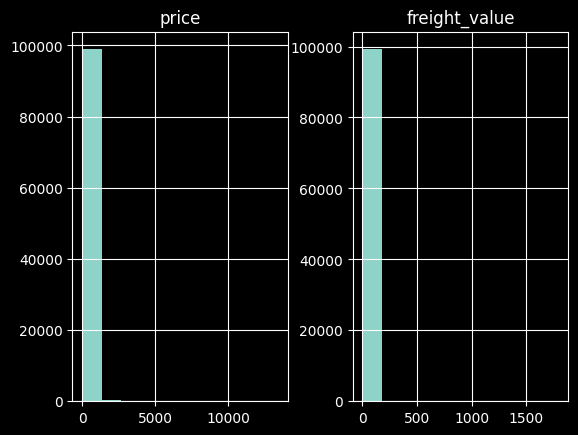

In [112]:
df1_1[['price', 'freight_value']].hist()

#### Eksplor Penjualan Pada Q1 2016

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2